### Build Our Model

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [11]:
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('archive/english.csv')
directory = "archive"

imageDatas = []
files = dataset["image"]
label = dataset["label"]

i = 0
print("=======starting======")
for fileName in files:
    image=tf.keras.utils.load_img(os.path.join(directory,fileName),color_mode='grayscale',target_size=(100,100))
    image=tf.keras.utils.img_to_array(image)
    image=image/255.0
    imageDatas+=[image]
    i = i + 1
    if (i % 500 == 0):
        print(i)

class_names = dataset["label"].unique()
print(class_names)
print("=======done======")

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

=======starting======
500
1000
1500
2000
2500
3000
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
=======done======


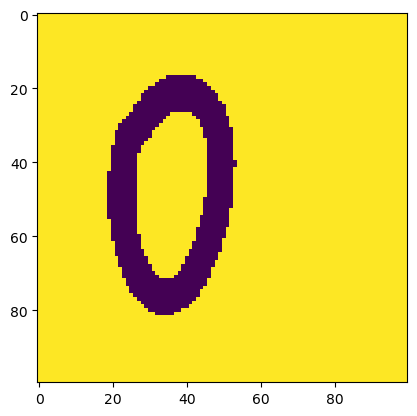

label:  0


In [30]:
# varify the image data
directory = "archive"
showingImage=tf.keras.utils.load_img(os.path.join(directory,files[0]),color_mode='grayscale',target_size=(100,100))
plt.imshow(imageDatas[0])
plt.show()

print("label: ", label[0])
# print(imageDatas[0][20])

(100, 100, 1)
compressed:  500  imgs
compressed:  1000  imgs
compressed:  1500  imgs
compressed:  2000  imgs
compressed:  2500  imgs
compressed:  3000  imgs
==
(3410, 20, 20, 1)


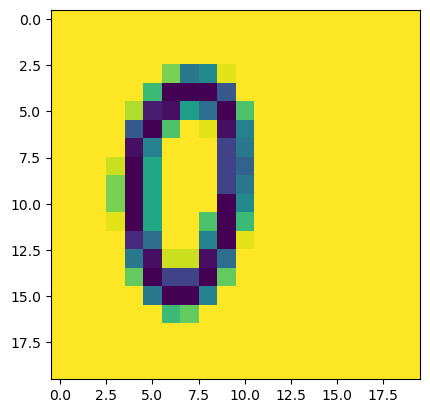

In [133]:
ImageData_compressed = []

print(np.array(imageDatas[0]).shape) 

# test = []
# test += [imageDatas[0]]
count = 0
for img in imageDatas:
    img_compressed = []
    for i in range(20):
        row_compressed = []
        for j in range(20):
            sum = 0
            for r in range(5):
                for c in range(5):
                    sum += img[5 * i + r][5 *j + c]
            row_compressed += [sum/25]
            # print(np.array(row_compressed).shape)
            
        img_compressed += [row_compressed]
        # print(np.array(img_compressed).shape)
    ImageData_compressed += [img_compressed]
    count += 1
    if (count % 500 == 0):
        print("compressed: ", count, " imgs" )

print("==")
print(np.array(ImageData_compressed).shape)
plt.imshow(ImageData_compressed[0])
# print(ImageData_compressed[0])
plt.show()

(100, 100, 1)
====start compressing====
compressed:  500  imgs
compressed:  1000  imgs
compressed:  1500  imgs
compressed:  2000  imgs
compressed:  2500  imgs
compressed:  3000  imgs
==
(3410, 20, 20)


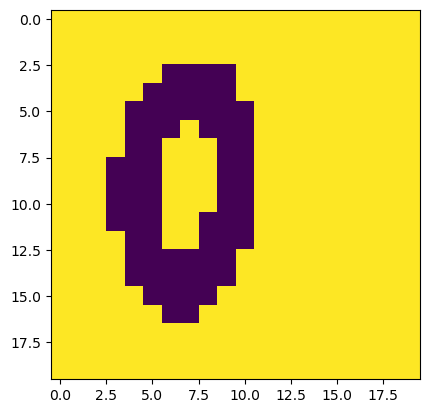

In [159]:
ImageData_compressed_type2 = []

print(np.array(imageDatas[0]).shape) 

# test = []
# test += [imageDatas[0]]
count = 0
print("====start compressing====")
for img in imageDatas:
    img_compressed = []
    for i in range(20):
        row_compressed = []
        for j in range(20):
            sum = 0
            for r in range(5):
                for c in range(5):
                    sum += img[5 * i + r][5 *j + c]
            if (sum < 25):
                row_compressed += [0.0]
            else:
                row_compressed += [1.0]
            # print(np.array(row_compressed).shape)
            
        img_compressed += [row_compressed]
        # print(np.array(img_compressed).shape)
    ImageData_compressed_type2 += [img_compressed]
    count += 1
    if (count % 500 == 0):
        print("compressed: ", count, " imgs" )

print("==")
print(np.array(ImageData_compressed_type2).shape)
plt.imshow(ImageData_compressed_type2[0])
# print(ImageData_compressed[0])
plt.show()

In [152]:
print(ImageData_compressed[0][11][5])
print(ImageData_compressed_type2[0][11][5])

[0.6]
1.0


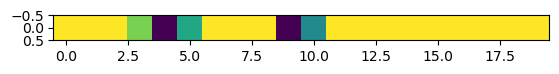

In [153]:
plt.imshow([ImageData_compressed[0][10]])

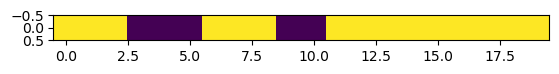

In [160]:
plt.imshow([ImageData_compressed_type2[0][10]])

In [96]:
def getIndex(letter):
    index = ord(letter)-48
    if (index > 10):
        index -= 7
    if (index > 35):
        index -= 6
    return index

# process label to number
letters = label.unique()
print(letters)

# checking
indexs = []
for l in letters:
    indexs += [getIndex(l)]

print(indexs)
for i in range(61):
    if (i != indexs[i]):
        print("error in: ", i)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' 'A' 'B' 'C' 'D' 'E' 'F' 'G' 'H'
 'I' 'J' 'K' 'L' 'M' 'N' 'O' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'k' 'l' 'm' 'n' 'o' 'p' 'q' 'r'
 's' 't' 'u' 'v' 'w' 'x' 'y' 'z']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


In [165]:
data_nparr=np.array(ImageData_compressed)
# data_nparr=np.array(ImageData_compressed_type2)
# data_nparr=np.array(imageDatas)
label_nparr=np.array(label)
label_index_nparr = np.vectorize(getIndex)(label_nparr)

train_data, test_data, train_label, test_label = train_test_split(data_nparr, label_index_nparr, test_size=0.1, random_state=42)
print("data splited")

data splited


In [175]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(20, 20, 1))) # compressed (20 x 20)
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1))) # uncompressed (100 x 100)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(62, activation='softmax'))
print("layer added")
model.summary()

layer added
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_55 (Conv2D)          (None, 18, 18, 32)        320       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 9, 9, 32)         0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 3, 3, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 1, 1, 64)          36928     
                                                                 
 flatten_18 (Flatten)        (None, 64)  

In [176]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

print("======start training======")
history = model.fit(train_data, train_label, epochs=20, 
                    validation_data=(test_data, test_label))
print("======done training======")

======start training======
Epoch 1/20
96/96 [==============================] - 3s 30ms/step - loss: 4.1295 - accuracy: 0.0166 - val_loss: 4.1300 - val_accuracy: 0.0059
Epoch 2/20
96/96 [==============================] - 2s 24ms/step - loss: 4.0332 - accuracy: 0.0332 - val_loss: 3.8612 - val_accuracy: 0.0587
Epoch 3/20
96/96 [==============================] - 3s 30ms/step - loss: 3.3934 - accuracy: 0.1535 - val_loss: 3.1301 - val_accuracy: 0.1877
Epoch 4/20
96/96 [==============================] - 2s 26ms/step - loss: 2.7347 - accuracy: 0.2848 - val_loss: 2.6506 - val_accuracy: 0.2786
Epoch 5/20
96/96 [==============================] - 3s 29ms/step - loss: 2.2851 - accuracy: 0.3920 - val_loss: 2.3229 - val_accuracy: 0.3548
Epoch 6/20
96/96 [==============================] - 3s 27ms/step - loss: 1.9652 - accuracy: 0.4793 - val_loss: 1.9987 - val_accuracy: 0.4633
Epoch 7/20
96/96 [==============================] - 3s 30ms/step - loss: 1.7169 - accuracy: 0.5272 - val_loss: 1.8530 - val_acc

11/11 - 0s - loss: 1.1064 - accuracy: 0.7097 - 53ms/epoch - 5ms/step


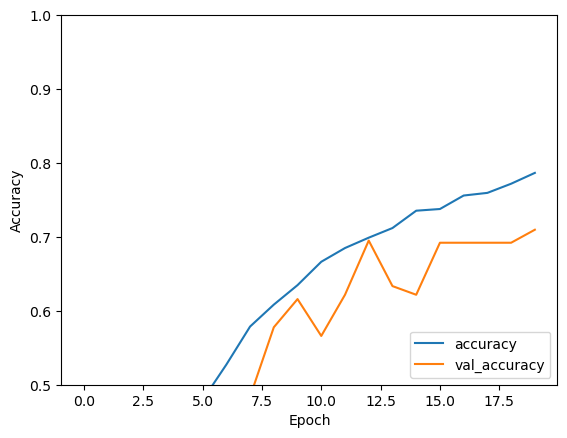

In [178]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_data,  test_label, verbose=2)

In [ ]:
print(test_acc)